<a href="https://colab.research.google.com/github/Suresh8352/CustomerSegmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation using K-Means Clustering With Python

Problem Statement : clusters the customers for mall.
K-means Clustering is an unsupervised Learning algorithm, which groups the unlabeled dataset into different cluster.Here K defines the no of pre-defined clusters that need to be created in the process.

Work_Flow:

Customer Data  --> Data pre processing --> Data Analysis --> optimum no of clusters --> K-means Clustering --> Visulising Clusters


In [ ]:
# Import the Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sms
from  sklearn.cluster import KMeans



# Data collection & Analysis

In [ ]:
#Loading the data from csv file to a pandas DAtaframe
cus= pd.read_csv("/content/drive/MyDrive/Placement_2024/Projects_Noncore/Custmer_Segmentation/Mall_Customers.csv")

In [ ]:
# first five rows in the datafram
cus.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Finding No of Rows and columns
cus.shape

(200, 5)

In [ ]:
# Info about custmer data
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Checking for missing Values
cus.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

we don't have any missing values.
Choosing the annual income column and spending score columns

In [ ]:
# taking 3rd and 4 th column for the
X=cus.iloc[:,[3,4]].values
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

# Choosing no of clusters
wcss--> within clusters sum of squares is a measure of the variability of the observation within the each clusters.
In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares.

In [ ]:
# finding wcss values for different no of clusters
wcss=[]
for i in range(1,11):       # 10 clusters
  kmeans=KMeans(n_clusters=i, init='k-means++',n_init=10,random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

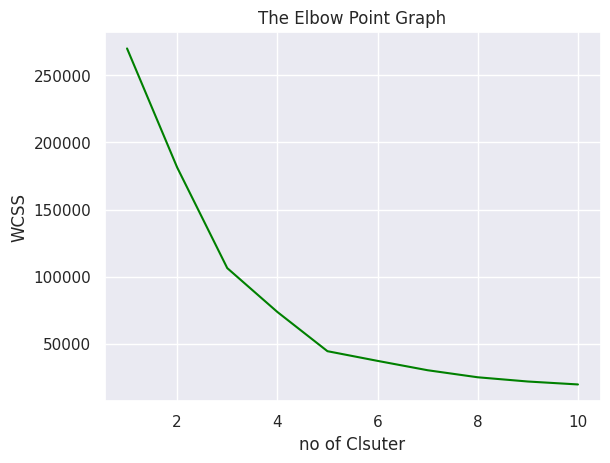

In [ ]:
# plot an elbow graph
sms.set()
plt.plot(range(1,11),wcss,color='green')
plt.title("The Elbow Point Graph")
plt.xlabel("no of Clsuter")
plt.ylabel("WCSS")
plt.show()

Optimum no of clusters =5
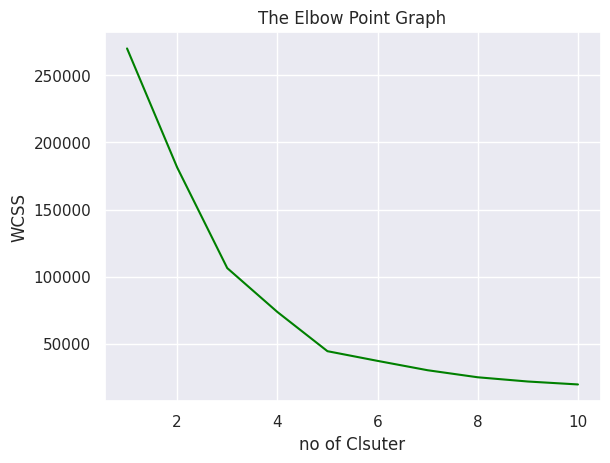

From this graph at no of is 3 there is more drop and at the  no of clusters is 5 more drop. so 5 is the elbow point from that no significant drop present.


#Training the K-Means Clsutering Model

In [ ]:
kmeans= KMeans(n_clusters=5,init='k-means++',n_init=10,random_state=0)
# return the label for the each data based on their cluster
Y= kmeans.fit_predict(X) # this will the label the cluster
print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# Visulising all the clustering

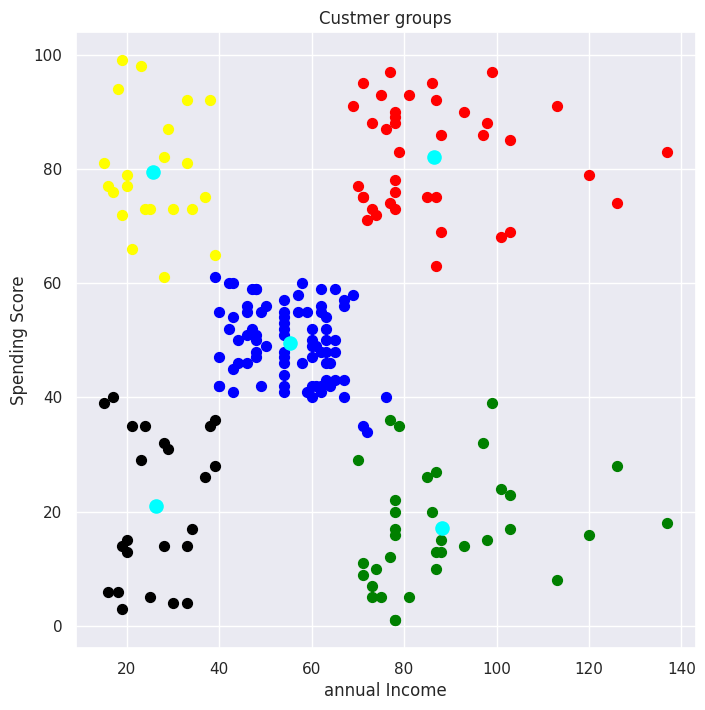

In [ ]:
# Plotting the all the cluster
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s=50,c='green',label="Cluster 1")
plt.scatter(X[Y==1,0],X[Y==1,1],s=50,c='blue',label="Cluster 2")
plt.scatter(X[Y==2,0],X[Y==2,1],s=50,c='red',label="Cluster 3")
plt.scatter(X[Y==3,0],X[Y==3,1],s=50,c='yellow',label="Cluster 4")
plt.scatter(X[Y==4,0],X[Y==4,1],s=50,c='black',label="Cluster 5")

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=90,c='cyan',label='centroids')
plt.title("Custmer groups")
plt.xlabel("annual Income")
plt.ylabel("Spending Score")
plt.show()

by seeing about scatter graph we can observe that which have less spending score so we have give them so discounts for better spending.

# We can analyse for the age (how age factor effect the spending score) and gender also we can do this if we want.
Thanks 😄😁😀😀😀😀